# Image Clustering for Cancer Cell Experiment

In [1]:
from numpy import array
import cv2
from os import listdir
from os.path import join

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

## Loading an Preprocessing of Images

All images are loaded by `cv2`, resized to `(224, 224, 3)`, preprocessed to match the requirements of `VGG16` and then fed through the non-top part of the model (including `Flatten()`) to get an representative image vector. These vectors can than be clustered.

In [2]:
width = 224
height = 224
IMAGE_DIM = (width, height)

In [3]:
def setup_model():
    vgg = VGG16(
        input_shape=(width, height, 3),
        weights="imagenet",
        include_top=False
    )

    for layer in vgg.layers:
        layer.trainable = False

    model = Sequential()
    model.add(vgg)
    model.add(Flatten())
    return model


def load_image(image_path):
    return preprocess_input(
        cv2.resize(
            cv2.imread(image_path, 1),
            IMAGE_DIM,
            interpolation=cv2.INTER_AREA
        )
    )

def load_image_folder(folder_path):
    images = []
    for image_path in listdir(folder_path):
        images.append(load_image(join(folder_path,image_path)))

    return array(images)

def cluster_images(flat_images, title):
    Z = hierarchy.linkage(flat_images, method="ward")
    hierarchy.dendrogram(Z)
    plt.title(title)
    plt.show()

## Clustering images

In [4]:
model = setup_model()

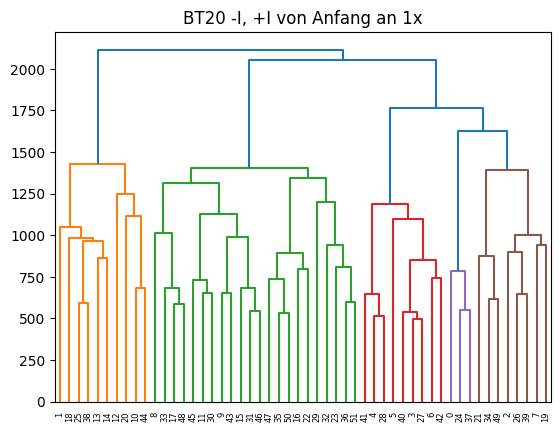

In [5]:
title = "BT20 -I, +I von Anfang an 1x"
images = load_image_folder("input_data/Images_Cropped/a")
flat_images = model.predict(images, verbose=0)

cluster_images(flat_images, title)

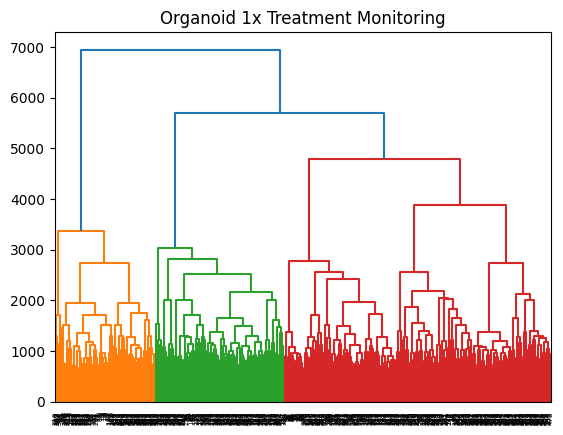

In [6]:
title = "Organoid 1x Treatment Monitoring"
images = load_image_folder("input_data/Images_Cropped/b")
flat_images = model.predict(images, verbose=0)

cluster_images(flat_images, title)

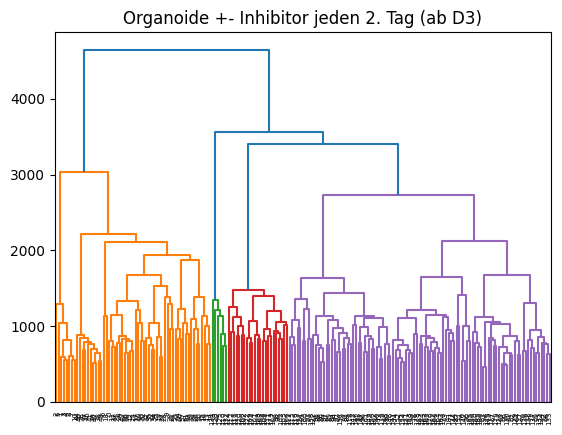

In [7]:
title = "Organoide +- Inhibitor jeden 2. Tag (ab D3)"
images = load_image_folder("input_data/Images_Cropped/c")
flat_images = model.predict(images, verbose=0)

cluster_images(flat_images, title)

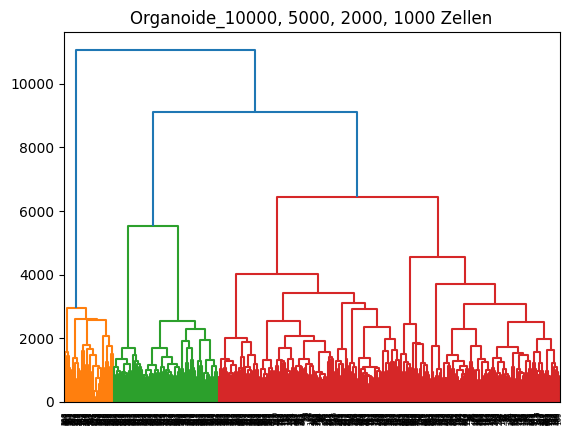

In [8]:
title = "Organoide_10000, 5000, 2000, 1000 Zellen"
images = load_image_folder("input_data/Images_Cropped/d")
flat_images = model.predict(images, verbose=0)

cluster_images(flat_images, title)